# Final Project - Classification of Clothing Items
## Pragya Jalan

## Importing Libraries

In [2]:
import keras
import numpy as np
from keras.datasets import fashion_mnist
from matplotlib import pyplot
from scipy.misc import toimage
from sklearn.metrics import confusion_matrix
from collections import OrderedDict
import itertools

import cv2
from matplotlib import pyplot as plt
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

%matplotlib inline


Using TensorFlow backend.


## **Importing Data**

In [3]:

fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


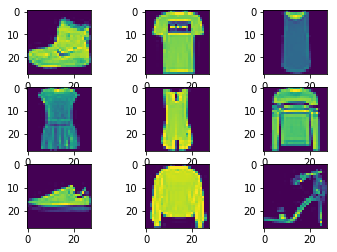

In [4]:
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
# show the plot

pyplot.show()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

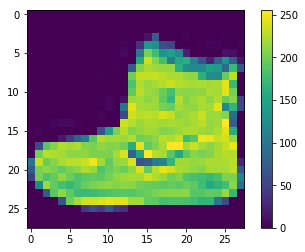

In [6]:
pyplot.figure()
pyplot.imshow(X_train[0])
pyplot.colorbar()
pyplot.grid(False)
pyplot.show()

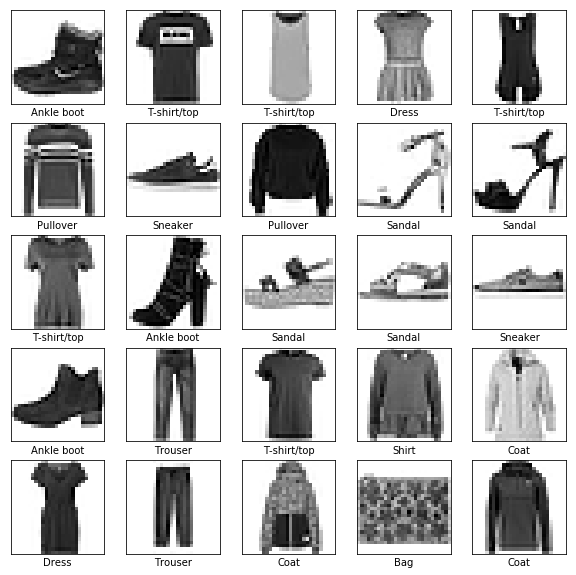

In [7]:
pyplot.figure(figsize=(10,10))
for i in range(25):
    pyplot.subplot(5,5,i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(X_train[i], cmap=pyplot.cm.binary)
    pyplot.xlabel(class_names[y_train[i]])
pyplot.show()

## **Data Wrangling**

In [8]:
print('train data shape : {}'.format(X_train.shape))
print('test data shape : {}'.format(X_test.shape))

train data shape : (60000, 28, 28)
test data shape : (10000, 28, 28)


In [9]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0


print('train data shape : {}'.format(X_train.shape))
print('test data shape : {}'.format(X_test.shape))

train data shape : (60000, 28, 28, 1)
test data shape : (10000, 28, 28, 1)


## **Building the Model**

In [10]:

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)  

In [11]:
epochs = 50
batch_size=32
model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=epochs, 
                    batch_size=batch_size)

scores = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 23s 383us/step - loss: 0.5070 - acc: 0.8104 - val_loss: 0.3501 - val_acc: 0.8636
Epoch 2/50
60000/60000 [==============================] - 17s 281us/step - loss: 0.3257 - acc: 0.8788 - val_loss: 0.3107 - val_acc: 0.8852
Epoch 3/50
60000/60000 [==============================] - 17s 281us/step - loss: 0.2868 - acc: 0.8954 - val_loss: 0.2851 - val_acc: 0.8953
Epoch 4/50
60000/60000 [==============================] - 17s 289us/step - loss: 0.2626 - acc: 0.9035 - val_loss: 0.2639 - val_acc: 0.9045
Epoch 5/50
60000/60000 [==============================] - 17s 280us/step - loss: 0.2528 - acc: 0.9085 - val_loss: 0.2479 - val_acc: 0.9103
Epoch 6/50
60000/60000 [==============================] - 17s 279us/step - loss: 0.2385 - acc: 0.9143 - val_loss: 0.2446 - val_acc: 0.9103
Epoch 7/50
60000/60000 [==============================] - 17s 279us/

In [12]:
predictions = model.predict(X_test)
print(predictions)

[[1.5824467e-38 0.0000000e+00 2.2892394e-38 ... 4.2318698e-07
  1.2435947e-29 9.9999952e-01]
 [7.0780359e-09 6.1372183e-26 9.9999654e-01 ... 0.0000000e+00
  4.6742339e-22 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.9253673e-13 2.4596598e-16 4.2050819e-15 ... 1.2824628e-04
  2.2746798e-08 2.1379035e-06]]


### **Plot the training and validation loss**

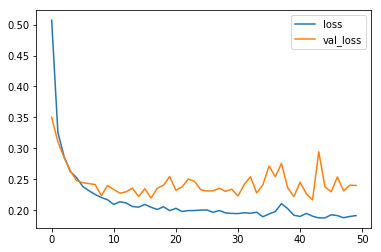

In [13]:
pyplot.plot(history.history['loss'], label='loss')
pyplot.plot(history.history['val_loss'], label='val_loss')
pyplot.legend()
pyplot.show()

### **Plot the training and validation accuracy**

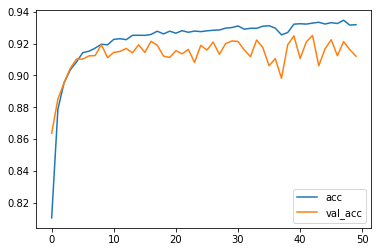

In [14]:
pyplot.plot(history.history['acc'], label='acc')
pyplot.plot(history.history['val_acc'], label='val_acc')
pyplot.legend()
pyplot.show()

In [0]:
mapping = {
    "0" : "T-shirt/top",
    "1" : "Trouser",
    "2" : "Pullover",
    "3" : "Dress",
    "4" : "Coat",
    "5" : "Sandal",
    "6" : "Shirt",
    "7" : "Sneaker",
    "8" : "Bag",
    "9" : "Ankle boot"
}

## Predicting / Visualizing the Results 

Predicted as T-shirt/top


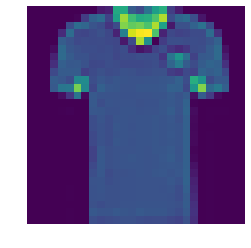

<Figure size 2016x2016 with 0 Axes>

In [16]:
pyplot.imshow(X_test[59].reshape(28,28))
pyplot.axis('off')
pyplot.figure(figsize=(28,28))
class_val = np.argmax(model.predict(X_test[59].reshape(-1,28,28,1)))
print("Predicted as {}".format(mapping[str(class_val)]))

### Predicting from the test set

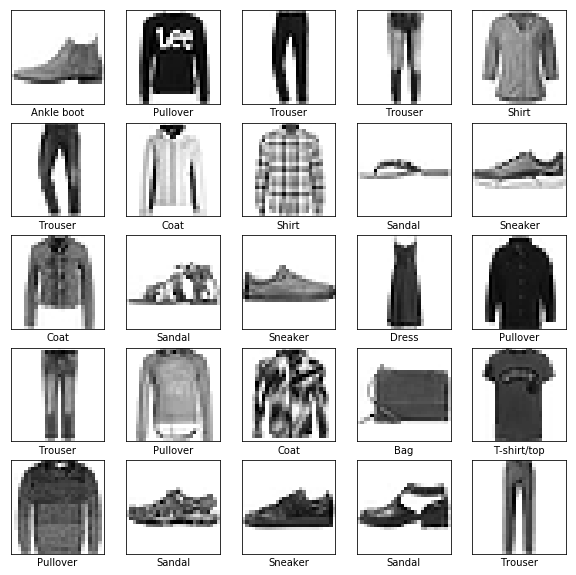

In [17]:
pyplot.figure(figsize=(10,10))
for i in range(25):
    pyplot.subplot(5,5,i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(X_test[i].reshape(28,28), cmap=pyplot.cm.binary)
    class_val = np.argmax(model.predict(X_test[i].reshape(-1,28,28,1)))
    pyplot.xlabel(mapping[str(class_val)])
pyplot.show()

### Predicting an image outside the dataset

--2019-05-14 18:39:03--  https://images-na.ssl-images-amazon.com/images/I/412V6B5Fo4L._SY445_QL70_.jpg
Resolving images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)... 99.84.246.106
Connecting to images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)|99.84.246.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12011 (12K) [image/jpeg]
Saving to: ‘412V6B5Fo4L._SY445_QL70_.jpg.2’

412V6B5Fo4L._SY445_ 100%[===================>]  11.73K  --.-KB/s    in 0s      

2019-05-14 18:39:03 (210 MB/s) - ‘412V6B5Fo4L._SY445_QL70_.jpg.2’ saved [12011/12011]



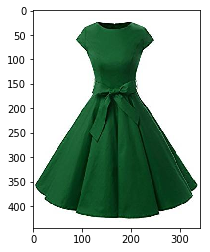

(1, 28, 28, 3)


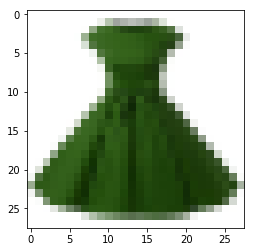

Predicted as Dress
--2019-05-14 18:39:04--  https://dimg.dillards.com/is/image/DillardsZoom/nav2/brahmin-melbourne-collection-medium-asher-tote/04774914_zi_sunflower.jpg
Resolving dimg.dillards.com (dimg.dillards.com)... 96.17.122.143
Connecting to dimg.dillards.com (dimg.dillards.com)|96.17.122.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40268 (39K) [image/jpeg]
Saving to: ‘04774914_zi_sunflower.jpg’

04774914_zi_sunflow 100%[===================>]  39.32K  --.-KB/s    in 0.01s   

2019-05-14 18:39:04 (3.59 MB/s) - ‘04774914_zi_sunflower.jpg’ saved [40268/40268]



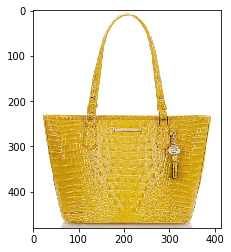

(1, 28, 28, 3)


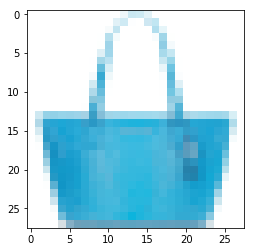

Predicted as Bag


In [22]:
!wget 'https://images-na.ssl-images-amazon.com/images/I/412V6B5Fo4L._SY445_QL70_.jpg'

img = cv2.imread("412V6B5Fo4L._SY445_QL70_.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()


dim = (28, 28)
resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

img_tensor = image.img_to_array(resized_img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

print(img_tensor.shape)
img_tensor

plt.imshow(img_tensor[0])
plt.show()

class_val = np.argmax(model.predict(img_tensor.reshape(-1,28,28,1)))
print("Predicted as {}".format(mapping[str(class_val)]))


!wget 'https://dimg.dillards.com/is/image/DillardsZoom/nav2/brahmin-melbourne-collection-medium-asher-tote/04774914_zi_sunflower.jpg'

img = cv2.imread("04774914_zi_sunflower.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()


dim = (28, 28)
resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

img_tensor = image.img_to_array(resized_img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

print(img_tensor.shape)
img_tensor

plt.imshow(img_tensor[0])
plt.show()

class_val = np.argmax(model.predict(img_tensor.reshape(-1,28,28,1)))
print("Predicted as {}".format(mapping[str(class_val)]))


## Confusion Matrix

Normalized confusion matrix


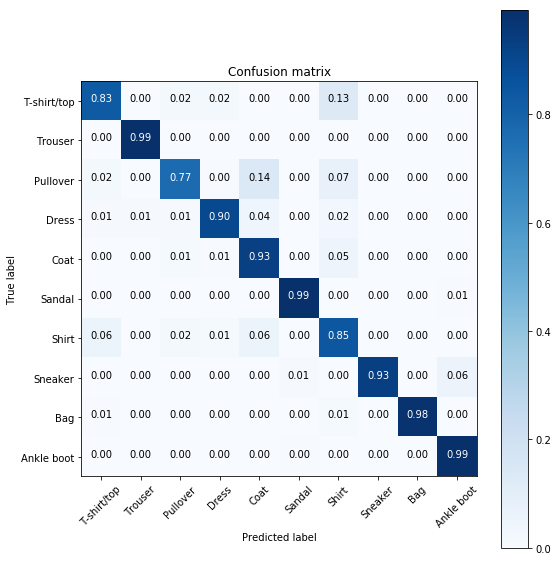

In [21]:

#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


preds = np.argmax(model.predict(X_test), axis = 1)
y_orig = np.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, class_names, normalize=True)
